In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import Params
from experiment import run_experiments
from experiment import load_experiments
from experiment import draw_logs
from experiment import experiments_to_df

from analysis import draw_several

### Эксперимент

In [17]:
experiments_10, df_10 = load_experiments('../results/experim_10.json')
experiments_11, df_11 = load_experiments('../results/experim_11.json')
experiments_12, df_12 = load_experiments('../results/experim_12.json')
experiments_13, df_13 = load_experiments('../results/experim_13.json')
experiments_14, df_14 = load_experiments('../results/experim_14.json')
experiments_15, df_15 = load_experiments('../results/experim_15.json')
experiments_16, df_16 = load_experiments('../results/experim_16.json')
experiments_17, df_17 = load_experiments('../results/experim_17.json')
experiments_18, df_18 = load_experiments('../results/experim_18.json')

In [38]:
merged_1 = experiments_10 + experiments_11 + experiments_12 + experiments_13
df_1 = experiments_to_df(merged_1)
mask = (df_1["train_window"] == 5) | (df_1["train_window"] == 10) | (df_1["train_window"] == 20) | (df_1["train_window"] == 50)
df_1[mask]

,noise_var,train_window,weight_function,mixing_type,alpha_function,mean,random_0,random_1,random_2,random_3
1,1,5,1 / ((x + 1) * (ln(x + 1))^2),start,1 / (x + 1),226218.03,179636.6,171319.66,283498.78,270417.09
3,1,5,1 / (x^1.01),start,1 / (x + 1),186550.57,150940.0,148558.71,232111.88,214591.69
40,1,5,1 / (x^1.1),start,1 / (x + 1),187289.65,148776.65,147120.11,233924.38,219337.47
42,1,5,1 / (x^1.2),start,1 / (x + 1),188112.40,146446.71,145873.47,235725.47,224403.96
41,1,5,1 / (x^2),start,1 / (x + 1),197134.80,150365.73,134535.62,278964.69,224673.16
0,1,5,1 / ((x + 4) * ln(x + 4) * (ln(ln(x + 4)))^2,start,1 / (x + 1),217864.95,174100.04,167340.17,272566.59,257453.01
2,1,5,1 / c,start,1 / (x + 1),147226.05,105107.15,129573.35,175125.41,179098.3
21,1,5,1 / x,start,1 / (x + 1),186472.68,151169.81,148745.64,231898.43,214076.82
22,1,5,1 / (x^0.1),start,1 / (x + 1),150954.24,109597.55,133745.09,179190.82,181283.5
55,1,5,1 / (x^0.3),start,1 / (x + 1),155325.26,115303.88,137242.29,185123.3,183631.58


In [48]:
merged_2 = experiments_14 + experiments_15 + experiments_16
df_2 = experiments_to_df(merged_2)
mask = (df_2["train_window"] == 20) & (df_2["weight_function"] == weight_hypers["const"].repr)
df_2[mask]

,noise_var,train_window,weight_function,mixing_type,alpha_function,mean,random_0,random_1,random_2,random_3
24,0.1,20,1 / c,start,1 / (x + 1),144968.39,126063.75,126641.34,162262.57,164905.9
27,2,20,1 / c,start,1 / (x + 1),138730.58,118127.15,121019.86,163570.14,152205.16
30,5,20,1 / c,start,1 / (x + 1),117181.39,100813.82,93848.54,145773.31,128289.88
47,8,20,1 / c,start,1 / (x + 1),97375.27,80944.86,69782.89,132496.28,106277.06
33,10,20,1 / c,start,1 / (x + 1),88021.20,69355.3,55009.03,124925.13,102795.36
53,12,20,1 / c,start,1 / (x + 1),69894.02,57385.05,30911.72,100978.25,90301.05
59,14,20,1 / c,start,1 / (x + 1),-26082.62,50408.12,-328560.03,99255.3,74566.15
65,16,20,1 / c,start,1 / (x + 1),-150619.11,-173413.42,-486962.79,-12509.08,70408.86
71,18,20,1 / c,start,1 / (x + 1),-256271.85,-293584.64,-479158.45,-42027.24,-210317.08
36,20,20,1 / c,start,1 / (x + 1),-246674.30,-329962.98,-375113.89,-78955.07,-202665.25


In [73]:
merged = experiments_10 + experiments_11
df = experiments_to_df(merged)
w_mask = (df["weight_function"] == weight_hypers["simple_101"].repr) | (df["weight_function"] == weight_hypers["diverge_05"].repr) | (df["weight_function"] == weight_hypers["const"].repr)
df_ap = df[w_mask & (df["train_window"] == 10)]

merged_3 = experiments_17 + experiments_18
df_3 = experiments_to_df(merged_3)
pd.concat((df_3, df_ap)).sort_values(by="mean")

,noise_var,train_window,weight_function,mixing_type,alpha_function,mean,random_0,random_1,random_2,random_3
24,1,10,1 / (x^0.5),start,1 / (x + 1),108630.68,93992.5,90539.95,131792.11,118198.15
8,1,10,1 / (x^0.5),start,1 / (x + 10),108638.55,93990.4,90540.39,131806.2,118217.2
1,1,10,1 / (x^0.5),start,1 / (x + 100),108732.56,93995.52,90554.25,131968.44,118412.02
18,1,10,1 / (x^0.5),start,1 / (x + 1000),110389.16,95338.31,91210.9,134470.54,120536.9
6,1,10,1 / c,start,1 / (x + 1),113998.26,97744.0,95101.48,135556.48,127591.07
10,1,10,1 / c,start,1 / (x + 10),114051.47,97795.94,95122.59,135641.66,127645.7
2,1,10,1 / c,start,1 / (x + 100),114568.90,98307.09,95329.49,136462.69,128176.33
20,1,10,1 / c,start,1 / 100,117521.60,103879.37,104580.13,139638.76,121988.14
16,1,10,1 / c,start,1 / (x + 1000),118512.52,102396.88,96982.18,142409.52,132261.51
14,1,10,1 / (x^1.01),start,1 / (x + 1)^1.5,125699.71,109838.41,99846.98,152764.2,140349.25


In [5]:
# enumerated = [(num, experiment) for num, experiment in enumerate(experiments)]
# for num, experiment in enumerated[::7]:
#     draw_logs(experiment.logs, show=["master", "ideal"], title=f"Experiment №{num},  regret = {experiment.regret:.1f}", fig_size=(12, 5))

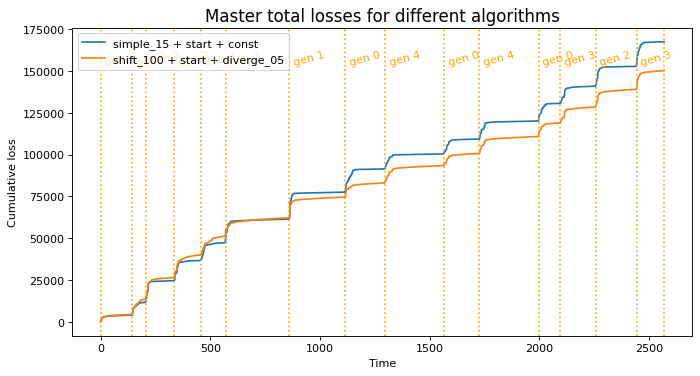

In [6]:
vital = experiments[:2]
anls = [experiment.logs for experiment in vital]
labels = [experiment.key_a + " + " + experiment.mixing_type + " + " + experiment.key_w for experiment in vital]
colors = [None] * 2
draw_several(logs=anls, labels=labels, colors=colors)